# Titanic Disaster

This notebook shows a possible solution of the Kaggle problem using Tensorflow. Firstly, we load and preprocess training and test datasets

## I. Load and preprocess

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

train = pd.read_csv('data/train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('data/test.csv' , header = 0, dtype={'Age': np.float64})
full_data = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We ensure all data is loaded, and check datatypes

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## II. Feature Engineering
### 1. Causal link between age and surival

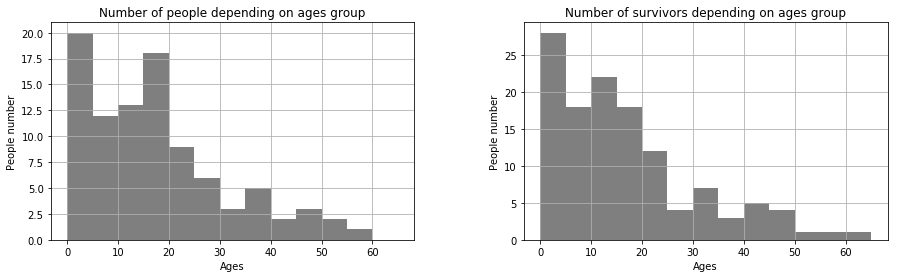

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

people = train.dropna(axis=0, how='any')
survivors = train[(train.Survived == 1)]

people[['Age']].diff().hist(ax=axes[0], color='k', alpha=0.5, bins=[i*5 for i in range(14)])
survivors[['Age']].diff().hist(ax=axes[1], color='k', alpha=0.5, bins=[i*5 for i in range(14)])

axes[0].set_title('Number of people depending on ages group'); axes[0].set_xlabel('Ages'); axes[0].set_ylabel('People number')
axes[1].set_title('Number of survivors depending on ages group'); axes[1].set_xlabel('Ages'); axes[1].set_ylabel('People number')

We can suppose there is **no correlation** between **age** and **survival**, but we know the age of only 183/891 people, that's probably insufficient to get conclusions. 

### 2. Causal link between pclass and survival

In [95]:
print (train[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


**62% of 1st class people survived**, against 47% in 2nd and only 24% in 3rd class. There is an **evident link** between **pclass** and **survival**.

### 3. Causal link between sex and survival